1. 使用Numpy创建一个4*3的随机数矩阵，并打印出最大最小元素？（5分）

In [22]:
import numpy as np

matrix = np.random.randint(0, 100, size=(4, 3))
matrix_min = np.min(matrix)
matrix_max = np.max(matrix)

print("min:{}, max:{}".format(matrix_min, matrix_max))
print(matrix)

min:2, max:96
[[68 71 96]
 [20 27 11]
 [82  6  2]
 [71  4 85]]


2.	使用Numpy创建一个6*6的矩阵，且矩阵边界全为3，里面全为1。（5分）

In [23]:
import numpy as np

matrix = np.ones((6, 6), dtype=np.int8)
matrix[0, :] = 3
matrix[5, :] = 3
matrix[:, 0] = 3
matrix[:, 5] = 3

print(matrix)

[[3 3 3 3 3 3]
 [3 1 1 1 1 3]
 [3 1 1 1 1 3]
 [3 1 1 1 1 3]
 [3 1 1 1 1 3]
 [3 3 3 3 3 3]]


3.	使用 matplotlib 简易画出 y=2cosx+3sinx 图像？（10分）

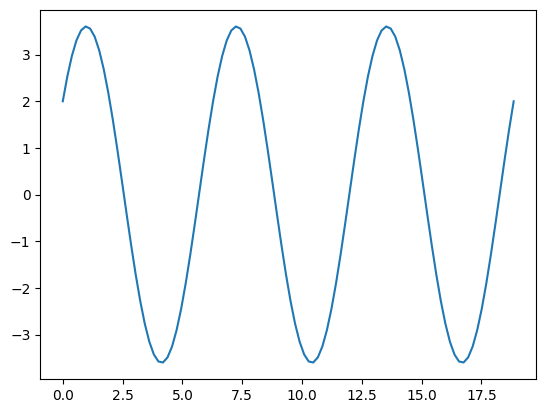

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 6 * np.pi, 100)
y = 2 * np.cos(x) + 3 * np.sin(x)
plt.plot(x, y)
plt.show()

4.	使用 pandas 生成一个有 5 列的 DataFrame，其中数据随机生成，列的索引使用 abcde，求哪一列的和最小，返回此列的索引？（10分）

In [24]:
import pandas as pd
import numpy as np

data = {
    'a': pd.Series(np.random.randint(0, 100, size=3)),
    'b': pd.Series(np.random.randint(0, 100, size=3)),
    'c': pd.Series(np.random.randint(0, 100, size=3)),
    'd': pd.Series(np.random.randint(0, 100, size=3)),
    'e': pd.Series(np.random.randint(0, 100, size=3))
}

df = pd.DataFrame(data)
matrix_sum = df.sum()
max_idx = matrix_sum.idxmax()

print(df)
print("max index: {}, max: {}".format(max_idx, matrix_sum[max_idx]))

    a   b   c   d   e
0  28  56  59  31  12
1  25  85  94  73  89
2  98  27  57  47   8
max index: c, max: 210


5.	调用mnist数据，统计每种类型图片（包含训练数据和测试数据）的数量，画出数量最多的那种数字的五个不同图像。（15分）

0~9 num counts: [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


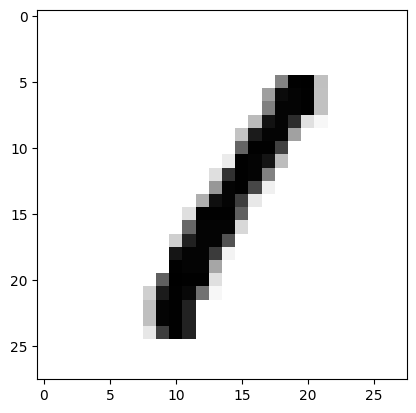

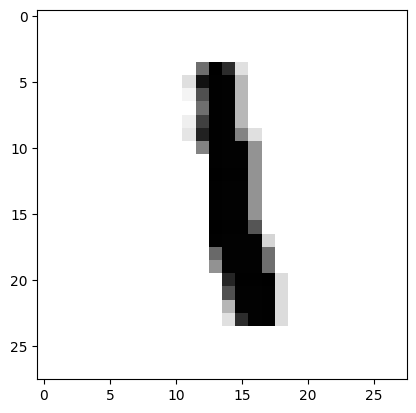

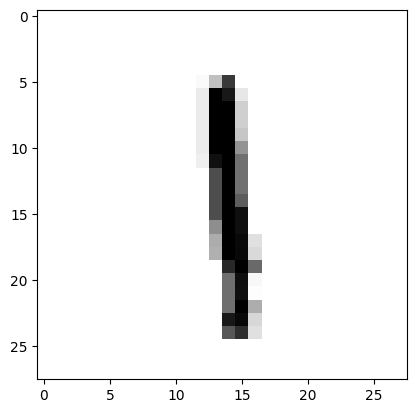

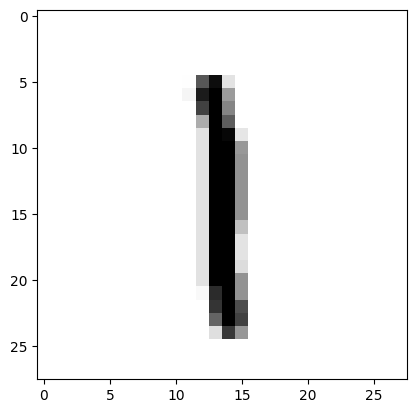

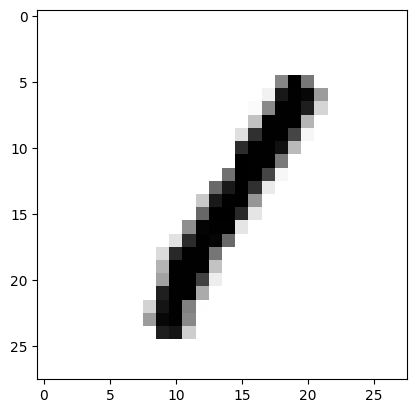

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_all = np.concatenate((x_train, x_test))
y_all = np.concatenate((y_train, y_test))

# 什么垃圾动态语言，定义都没有
num_counter = np.zeros(10, dtype=int)  # 数字个数
index_bank = np.zeros((10, 5), dtype=int)  # 数字图片的下标
index_bank.fill(-1)

# 处理数据
for i in range(y_all.size):
    num = y_all[i]
    num_counter[num] += 1  # 记录个数
    j = 0
    while j < 5 and index_bank[num][j] != -1:
        j += 1  # 在不越界的情况下往后找到空位
    if j < 5:
        index_bank[num][j] = i  # 放入数字图片的下标

print("0~9 num counts: {}".format(num_counter))  # 0~9 的图片个数
most_num = num_counter.argmax()  # 取出图片下标，打印出五张图片
for j in range(5):
    idx = index_bank[most_num][j]
    plt.imshow(x_train[idx], cmap=plt.get_cmap('gray_r'))  #画图
    plt.show()

6.	使用keras构建一个fashion_minist图像识别模型，有三个隐藏层，第一个隐藏层有60个节点，第二个隐藏层有40个节点，第三个隐藏层有20个节点，第一个隐藏层的激活函数是relu，后两个激活函数使用tanh，采用50%的dropout，对模型进行训练（epoch为20），显示评价结果（准确率和精确率），并将测试数据的预测结果输出到一个CSV文件。（20分）

In [8]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import precision_score, accuracy_score

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 模型构建及编译
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(40, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 模型训练
model.fit(train_images, train_labels, epochs=20)

# 模型评估
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
precision = precision_score(test_labels, y_pred_labels, average='micro')
accuracy = accuracy_score(test_labels, y_pred_labels)
print(f"Precision: {precision}, Accuracy: {accuracy}")

# 结果保存保存到 .csv 文件
np.savetxt('result.csv', y_pred, delimiter=',')


Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1660 - accuracy: 0.1772
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7315 - accuracy: 0.2622
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6511 - accuracy: 0.2993
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5998 - accuracy: 0.3221
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5602 - accuracy: 0.3298
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5151 - accuracy: 0.3440
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4740 - accuracy: 0.3580
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4652 - accuracy: 0.3600
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4742 - accuracy: 0.3739
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.431

7.	实现一个简单的房屋价格预测程序，文件price.csv为某房屋中介销售信息，其中第1列为房屋面积，第2列为房屋价格，请编写Python程序完成下面功能。（20分）

（1）使用pandas读取price.csv文件，并用matplotlib画出area和price的散点图，画出关于area的直方图。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("price.csv")

（2）利用线性方程计算房屋预测价格；主要方法为：利用Python读取price.csv文件第一列数据，并分别取参数w和b为下表数据，计算预测房屋价格Predict=w*Area+b，将计算结果存到price.csv的第3至第7列。


（3）计算预测房价和真实房价的均方根误差（RMSE）；利用文件第3至7列的值与第2列的值，分别计算在不同参数下预测房价与真实房价的均方根误差（RMSE），其中均方根误差可用下面函数计算。
